In [1]:
%load_ext autoreload
%autoreload 2

---

# Initialize

In [2]:
from nustar_planning.Planner import Target, Orbit, Planner, u, get_orbit_list

Obtain the list of available orbits during the time interval of interest.
***Be sure to check with Karl which orbits are available to you.***

In [3]:
window = get_orbit_list('2023-03-17 00:00:00', '2023-03-17 06:00:00')
print('Window orbits:')
for orbit in window:
    print(orbit)

Window orbits:
[<Time object: scale='utc' format='isot' value=2023-03-17T00:29:30.000>, <Time object: scale='utc' format='isot' value=2023-03-17T01:30:30.000>]
[<Time object: scale='utc' format='isot' value=2023-03-17T02:06:00.000>, <Time object: scale='utc' format='isot' value=2023-03-17T03:07:00.000>]
[<Time object: scale='utc' format='isot' value=2023-03-17T03:42:20.000>, <Time object: scale='utc' format='isot' value=2023-03-17T04:43:30.000>]


Create the `Planner` object to store all the orbit information.
Set the output directory to contain all generated products (plots and reports).
Orbits are given a defined time range (as provided by `get_orbit_list` command above and the *NuSTAR* people, e.g. Karl).
The targets are also given a time range, but the time range can be any subinterval within the orbit time range.
The subsequent projection plots and coordinate lists are generated with regards to the *coordinates at the mid-point of the target time range*.

In [4]:
planner = Planner('planner_example/')

# Define an orbit with a target

In [5]:
orbit1_time = window[0]
pois = [(-200, 350)]*u.arcsecond

target1 = Target(
    target_id = 'Target 1',
    time_range = orbit1_time,
    center = (0, -100)*u.arcsecond,
    fov = (-100, 0, 100)*u.arcsecond,
    angle = 0*u.degree,
    pois = pois,
    comments=(
        'This is a test.',
        'This is a second test.'
    )
)

orbit1 = Orbit(
    orbit_id = 'Orbit 1',
    time_range = orbit1_time,
    targets = [target1]
)

planner.add_orbit(orbit1)

# Make plots

You can plot the input information.

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia20230217_121800_0094.fits:   0%|          | 0.00/740k [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


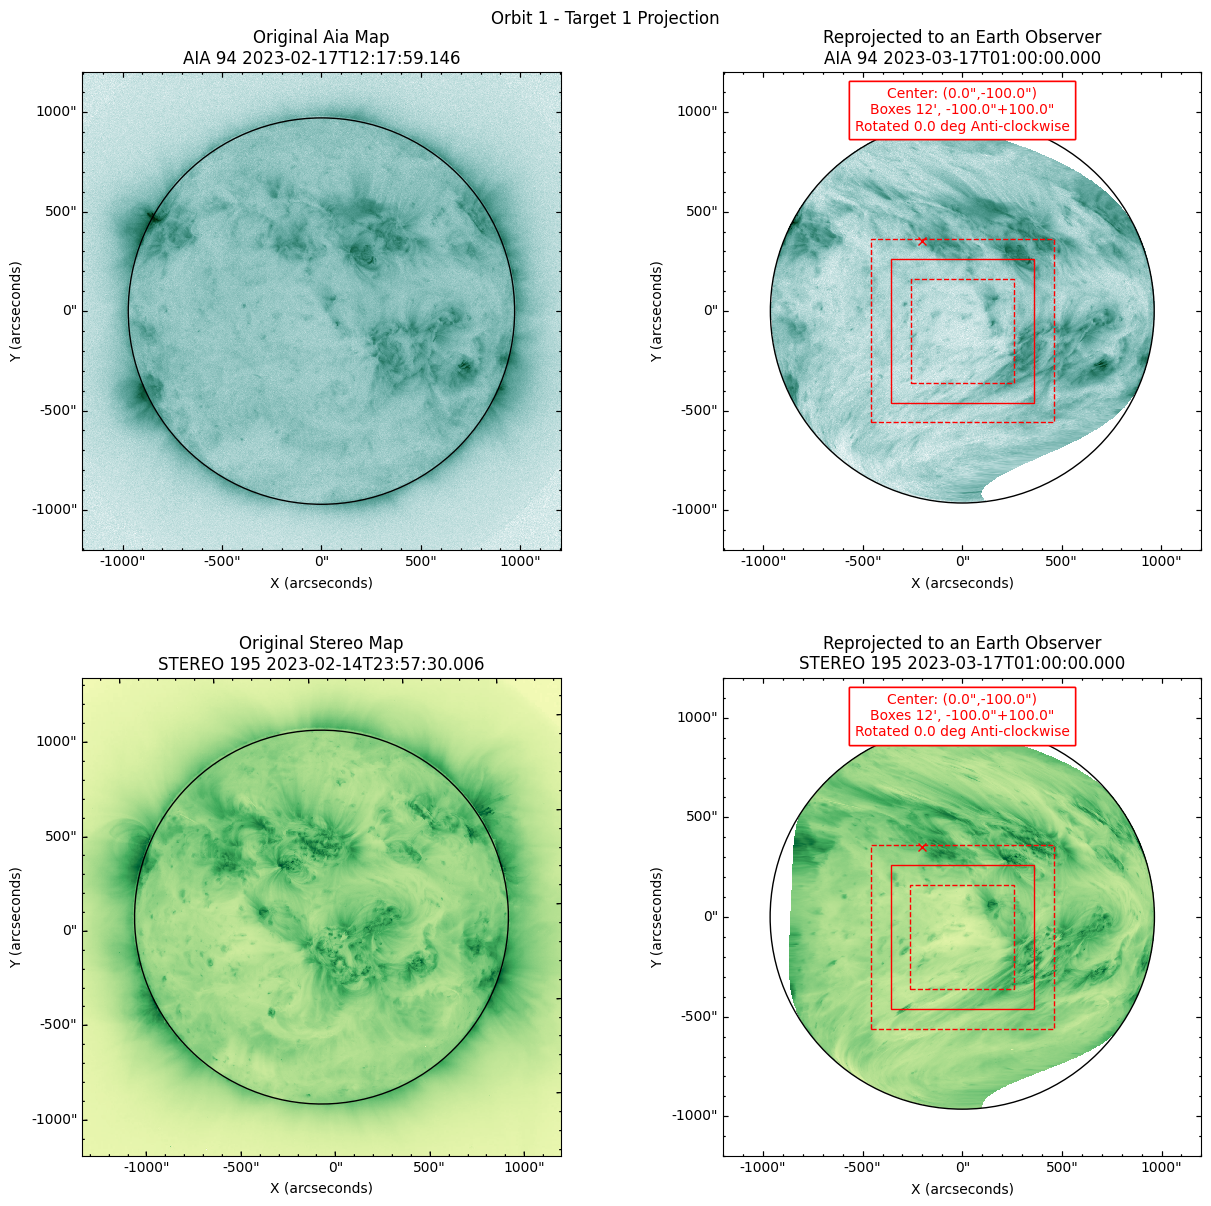

In [6]:
planner.plot_orbits()

# Report generation

You can generate a PDF report of the input information.
The PDF is compiled using LaTeX, and it will only work if it is locally available.

In [7]:
planner.generate_report()

sh: 1: module: not found


This is pdfTeX, Version 3.141592653-2.6-1.40.24 (TeX Live 2022) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
(/home/reed/Documents/Research/NuSTAR/Planning/test//test.tex
LaTeX2e <2022-06-01> patch level 5
L3 programming layer <2022-10-26>
(/home/reed/Documents/Research/Software/nustar_planning/templates/planning.cls
(/usr/local/texlive/2022/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/local/texlive/2022/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2022/texmf-dist/tex/latex/l3packages/xparse/xparse.sty
(/usr/local/texlive/2022/texmf-dist/tex/latex/l3kernel/expl3.sty
(/usr/local/texlive/2022/texmf-dist/tex/latex/l3backend/l3backend-pdftex.def)))
 (/usr/local/texlive/2022/texmf-dist/tex/latex/titlesec/titlesec.sty)
(/usr/local/texlive/2022/texmf-dist/tex/latex/graphics/graphicx.sty
(/usr/local/texlive/2022/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/20

# Timetable

You can also print a timetable giving the orbit times and coordinates.
This is the finalized information that is sent to Karl.

In [8]:
planner.generate_timetable()

For a "square" field of view, use angle = 0 / 90 / 180 / 270 to have DET0 at the NE (top left) / SE / SW / NW
corners of a square field of view.

Orbit: 1
Orbit start: 2023-03-17T00:29:30.000 -> Orbit end: 2023-03-17T01:30:30.000
Aim time: 2023-03-17T01:00:00.000 RA: 356.20578647743895 deg, Dec: -1.6740854749085319 deg
Roll: 335.33182747467794 deg






